#Análise do Campeões da Corrida de São Silvestre com Python

### Wilson Freitas

# Sobre o apresentador

## Wilson Freitas

- quant
- físico
- corredor 
- padeiro


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import sys
%pylab inline
print('python', sys.version)
print('pandas', pd.__version__)
print('statsmodels', sm.version.full_version)
print('seaborn', sns.__version__)

Populating the interactive namespace from numpy and matplotlib
python 3.4.1 (default, May 19 2014, 13:10:29) 
[GCC 4.2.1 Compatible Apple LLVM 5.1 (clang-503.0.40)]
pandas 0.16.0
statsmodels 0.6.1
seaborn 0.5.1


homepage: http://blog.aboutwilson.net/

github: https://github.com/wilsonfreitas/

twitter: https://twitter.com/aboutwilson

apresentação: https://github.com/wilsonfreitas/saosilvestre

In [2]:
ss = pd.read_csv('saosilvestre.csv')
ss.dtypes

nome        object
pais        object
corrida      int64
ano          int64
horario     object
tempo       object
percurso     int64
largada     object
chegada     object
dtype: object

In [3]:
ss = ss[['nome', 'pais', 'corrida', 'ano', 'horario', 'tempo', 'percurso']]
ss.head()

,nome,pais,corrida,ano,horario,tempo,percurso
0,Dawit Admasu,Etiópia,90,2014,09:00:00,00:45:04.000,15000
1,Ymer Wude Ayalew,Etiópia,90,2013,08:40:00,00:50:43.000,15000
2,Edwin Kipsang,Quênia,89,2013,09:00:00,00:43:47.000,15000
3,Nancy Kipron,Quênia,89,2013,08:40:00,00:51:58.000,15000
4,Edwin Kipsang,Quênia,88,2012,09:00:00,00:44:05.000,15000


In [4]:
ss[ss.corrida == 90]

,nome,pais,corrida,ano,horario,tempo,percurso
0,Dawit Admasu,Etiópia,90,2014,09:00:00,00:45:04.000,15000
1,Ymer Wude Ayalew,Etiópia,90,2013,08:40:00,00:50:43.000,15000


In [5]:
ss.ix[ss.corrida == 90, 'ano'] = 2014
ss.head()

,nome,pais,corrida,ano,horario,tempo,percurso
0,Dawit Admasu,Etiópia,90,2014,09:00:00,00:45:04.000,15000
1,Ymer Wude Ayalew,Etiópia,90,2014,08:40:00,00:50:43.000,15000
2,Edwin Kipsang,Quênia,89,2013,09:00:00,00:43:47.000,15000
3,Nancy Kipron,Quênia,89,2013,08:40:00,00:51:58.000,15000
4,Edwin Kipsang,Quênia,88,2012,09:00:00,00:44:05.000,15000


In [6]:
ss['tempo'] = pd.to_timedelta(ss['tempo'])
ss.dtypes

nome                 object
pais                 object
corrida               int64
ano                   int64
horario              object
tempo       timedelta64[ns]
percurso              int64
dtype: object

In [7]:
# ss['horario'] = pd.to_datetime(ss['ano'].map(str) + "-12-31 " + ss['horario'])

In [8]:
hr = ss.apply(lambda x: '%s-12-31 %s' % (x['ano'], x['horario']), axis=1)
ss['horario'] = pd.to_datetime(hr)
ss.dtypes

nome                 object
pais                 object
corrida               int64
ano                   int64
horario      datetime64[ns]
tempo       timedelta64[ns]
percurso              int64
dtype: object

In [9]:
ss['data'] = ss.apply(lambda x: datetime.datetime(x['ano'], 12, 31), axis=1)
ss.dtypes

nome                 object
pais                 object
corrida               int64
ano                   int64
horario      datetime64[ns]
tempo       timedelta64[ns]
percurso              int64
data         datetime64[ns]
dtype: object

In [10]:
ss['pace'] = 1000*ss['tempo']/ss['percurso']
print(ss.dtypes)
ss.head()

nome                 object
pais                 object
corrida               int64
ano                   int64
horario      datetime64[ns]
tempo       timedelta64[ns]
percurso              int64
data         datetime64[ns]
pace        timedelta64[ns]
dtype: object


,nome,pais,corrida,ano,horario,tempo,percurso,data,pace
0,Dawit Admasu,Etiópia,90,2014,2014-12-31 09:00:00,00:45:04,15000,2014-12-31,00:03:00.266666
1,Ymer Wude Ayalew,Etiópia,90,2014,2014-12-31 08:40:00,00:50:43,15000,2014-12-31,00:03:22.866666
2,Edwin Kipsang,Quênia,89,2013,2013-12-31 09:00:00,00:43:47,15000,2013-12-31,00:02:55.133333
3,Nancy Kipron,Quênia,89,2013,2013-12-31 08:40:00,00:51:58,15000,2013-12-31,00:03:27.866666
4,Edwin Kipsang,Quênia,88,2012,2012-12-31 09:00:00,00:44:05,15000,2012-12-31,00:02:56.333333


In [11]:
ss[ss.pace > datetime.timedelta(0, 4*60)]

,nome,pais,corrida,ano,horario,tempo,percurso,data,pace
26,Tesfaye Jifar,Etiópia,77,2001,2001-12-31 17:00:00,00:44:15,7300,2001-12-31,00:06:03.698630


In [12]:
ss.ix[ss.pace > datetime.timedelta(0, 4*60), 'percurso'] = 15000
ss['pace'] = 1000*ss['tempo']/ss['percurso']
ss.ix[[26]]

,nome,pais,corrida,ano,horario,tempo,percurso,data,pace
26,Tesfaye Jifar,Etiópia,77,2001,2001-12-31 17:00:00,00:44:15,15000,2001-12-31,00:02:57


In [13]:
ss.sort(['ano', 'pace'], inplace=True)
ss.tail(12)

,nome,pais,corrida,ano,horario,tempo,percurso,data,pace
10,James Kipsang,Quênia,85,2009,2009-12-31 16:55:00,00:44:40,15000,2009-12-31,00:02:58.666666
11,Pasalia Kipkoech Chepkorir,Quênia,85,2009,2009-12-31 16:45:00,00:52:30,15000,2009-12-31,00:03:30
8,Marilson Gomes dos Santos,Brasil,86,2010,2010-12-31 16:55:00,00:44:07,15000,2010-12-31,00:02:56.466666
9,Alice Timbilili,Quênia,86,2010,2010-12-31 15:15:00,00:50:19,15000,2010-12-31,00:03:21.266666
6,Tariku Bekele,Etiópia,87,2011,2011-12-31 17:30:00,00:43:35,15000,2011-12-31,00:02:54.333333
7,Priscah Jeptoo,Quênia,87,2011,2011-12-31 17:10:00,00:48:48,15000,2011-12-31,00:03:15.200000
4,Edwin Kipsang,Quênia,88,2012,2012-12-31 09:00:00,00:44:05,15000,2012-12-31,00:02:56.333333
5,Maurine Kipchumba,Quênia,88,2012,2012-12-31 08:40:00,00:51:42,15000,2012-12-31,00:03:26.800000
2,Edwin Kipsang,Quênia,89,2013,2013-12-31 09:00:00,00:43:47,15000,2013-12-31,00:02:55.133333
3,Nancy Kipron,Quênia,89,2013,2013-12-31 08:40:00,00:51:58,15000,2013-12-31,00:03:27.866666


In [14]:
ss_ano = ss.groupby('ano')
ss_sexo = ss_ano.apply(lambda x: 'masculino' if len(x) == 1 else ['masculino', 'feminino'])
ss_sexo

ano
1925                masculino
1926                masculino
1927                masculino
1928                masculino
1929                masculino
1930                masculino
1931                masculino
1932                masculino
1933                masculino
1934                masculino
1935                masculino
1936                masculino
1937                masculino
1938                masculino
1939                masculino
1940                masculino
1941                masculino
1942                masculino
1943                masculino
1944                masculino
1945                masculino
1946                masculino
1947                masculino
1948                masculino
1949                masculino
1950                masculino
1951                masculino
1952                masculino
1953                masculino
1954                masculino
                ...          
1985    [masculino, feminino]
1986    [masculino, feminino]
1987  

In [15]:
def flatten(x, l):
    if type(x) is list:
        for e in x:
            flatten(e, l)
    else:
        l.append(x)
sexo = []
flatten(ss_sexo.tolist(), sexo)
ss['sexo'] = sexo
ss.tail()

,nome,pais,corrida,ano,horario,tempo,percurso,data,pace,sexo
5,Maurine Kipchumba,Quênia,88,2012,2012-12-31 08:40:00,00:51:42,15000,2012-12-31,00:03:26.800000,feminino
2,Edwin Kipsang,Quênia,89,2013,2013-12-31 09:00:00,00:43:47,15000,2013-12-31,00:02:55.133333,masculino
3,Nancy Kipron,Quênia,89,2013,2013-12-31 08:40:00,00:51:58,15000,2013-12-31,00:03:27.866666,feminino
0,Dawit Admasu,Etiópia,90,2014,2014-12-31 09:00:00,00:45:04,15000,2014-12-31,00:03:00.266666,masculino
1,Ymer Wude Ayalew,Etiópia,90,2014,2014-12-31 08:40:00,00:50:43,15000,2014-12-31,00:03:22.866666,feminino


In [16]:
ss[ss['pais'].isnull()]

,nome,pais,corrida,ano,horario,tempo,percurso,data,pace,sexo
129,Alfredo Gomes,NaN,1,1925,1925-12-31 23:40:00,00:23:10,6200,1925-12-31,00:03:44.193548,masculino


In [17]:
ss.ix[ss['pais'].isnull(), 'pais'] = 'Brasil'

In [18]:
ss[ss['pais'] == '-']

,nome,pais,corrida,ano,horario,tempo,percurso,data,pace,sexo
29,Lydia Cheromei,-,76,2000,2000-12-31 15:15:00,00:50:33,15000,2000-12-31,00:03:22.200000,feminino
25,Marizete de Paula Rezende,-,78,2002,2002-12-31 15:15:00,00:54:02,15000,2002-12-31,00:03:36.133333,feminino


In [19]:
ss.ix[ss['pais'] == '-', 'pais'] = ['Quênia', 'Brasil']

In [20]:
ss.ix[[129, 29, 25]]

,nome,pais,corrida,ano,horario,tempo,percurso,data,pace,sexo
129,Alfredo Gomes,Brasil,1,1925,1925-12-31 23:40:00,00:23:10,6200,1925-12-31,00:03:44.193548,masculino
29,Lydia Cheromei,Quênia,76,2000,2000-12-31 15:15:00,00:50:33,15000,2000-12-31,00:03:22.200000,feminino
25,Marizete de Paula Rezende,Brasil,78,2002,2002-12-31 15:15:00,00:54:02,15000,2002-12-31,00:03:36.133333,feminino


In [21]:
sns.set_context('talk')
sns.set_style("darkgrid")

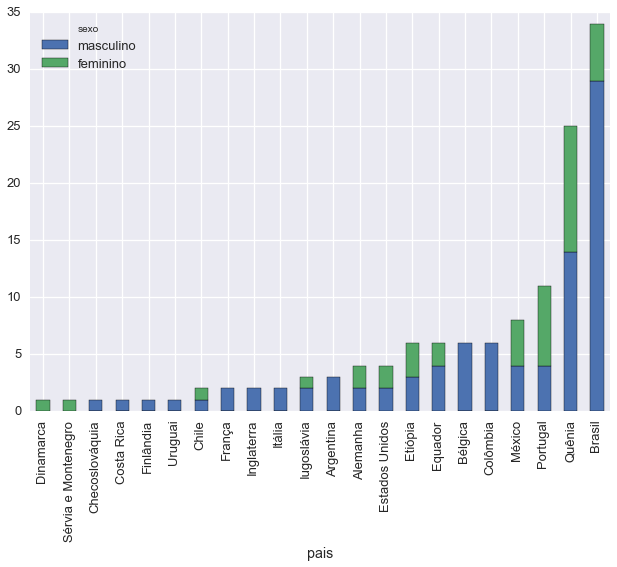

In [22]:
ss_pais = ss.groupby(['pais', 'sexo'])
ss_pais_sexo = ss_pais.sexo.count().unstack().fillna(0)
ss_pais_sexo['total'] = ss_pais_sexo.masculino + ss_pais_sexo.feminino
ss_pais_sexo = ss_pais_sexo.sort(['total', 'masculino'])
ss_pais_sexo[['masculino', 'feminino']].plot(kind='bar', stacked=True);

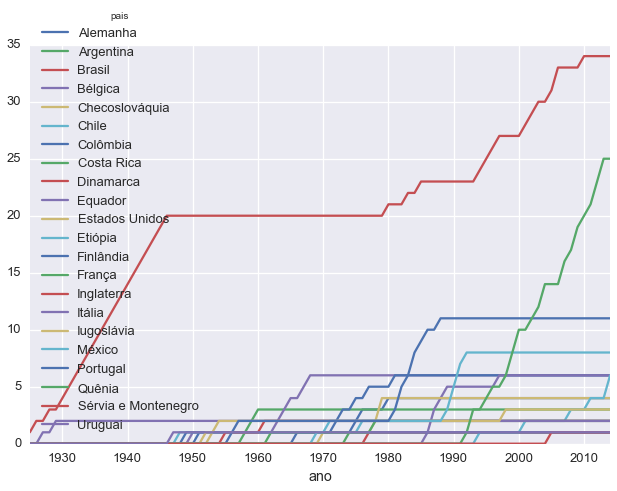

In [23]:
ss_pais_c = ss.groupby(['ano', 'pais']).corrida.count()
ss_pais_c.unstack().fillna(0).cumsum().plot();

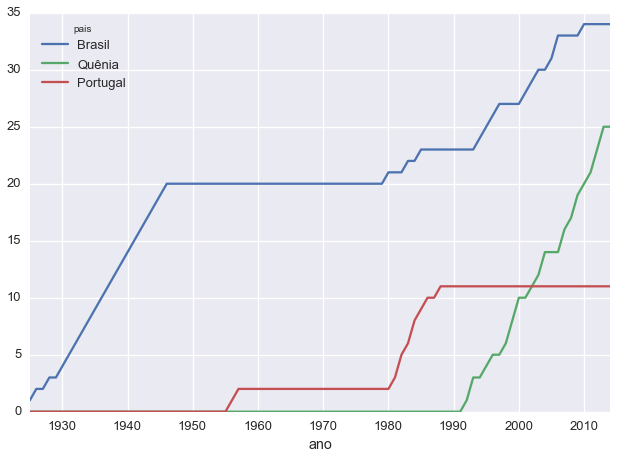

In [24]:
ss_pais_c.unstack()[['Brasil', 'Quênia', 'Portugal']].fillna(0).cumsum().plot();

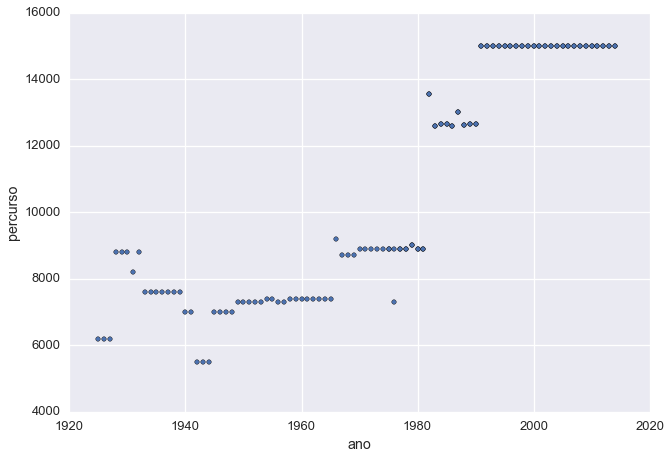

In [25]:
ss.plot(x='ano', y='percurso', kind='scatter');

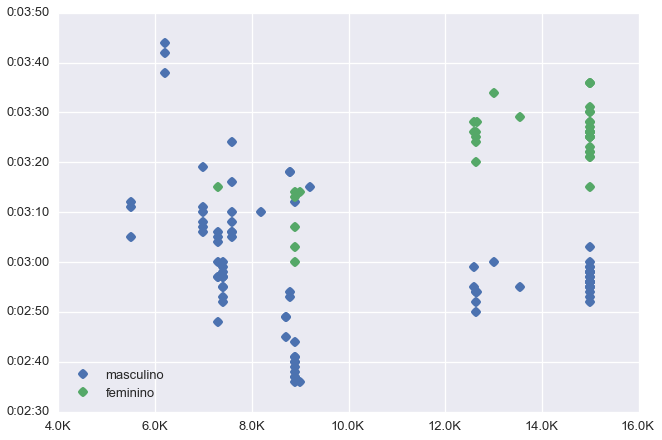

In [29]:
ss_pace = ss.ix[:,['sexo', 'ano', 'pace', 'percurso']]
ss_pace['pace'] = ss_pace.pace.astype('timedelta64[s]')
fig = plt.figure(); ax = fig.add_subplot(111)
masc = ss_pace.query('sexo == "masculino"'); fem = ss_pace.query('sexo == "feminino"')

ax.plot(masc.percurso, masc.pace, 'o', label='masculino')
ax.plot(fem.percurso, fem.pace, 'o', label='feminino')

pace_formatter = matplotlib.ticker.FuncFormatter(lambda x, pos: str(datetime.timedelta(seconds=x)))
dist_formatter = matplotlib.ticker.FuncFormatter(lambda x, pos: str(x/1000) + 'K')
ax.xaxis.set_major_formatter(dist_formatter)
ax.yaxis.set_major_formatter(pace_formatter)
plt.legend(loc=3)
plt.show()

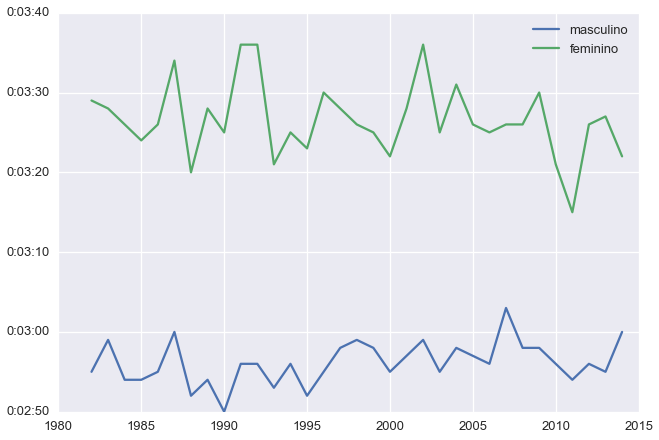

In [30]:
ss_long = ss.query('percurso > 12000')
ss_long.ix[:,'pace'] = ss_long['pace'].astype('timedelta64[s]')

fig = plt.figure(); ax = fig.add_subplot(111)
masc = ss_long.query('sexo == "masculino"'); fem = ss_long.query('sexo == "feminino"')

ax.plot(masc.ano, masc.pace, label='masculino'); ax.plot(fem.ano, fem.pace, label='feminino')

pace_fmt = matplotlib.ticker.FuncFormatter(lambda x,p: str(datetime.timedelta(seconds=x)))
ax.yaxis.set_major_formatter(pace_fmt)
plt.legend()
plt.show()

In [31]:
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')
temp = pd.read_csv('temperatura.csv', parse_dates=['Data'], date_parser=dateparse)
print(temp.dtypes)
temp.head()

Data                    datetime64[ns]
TempMaximaMedia                float64
TempCompensadaMedia            float64
TempMinimaMedia                float64
UmidadeRelativaMedia           float64
dtype: object


,Data,TempMaximaMedia,TempCompensadaMedia,TempMinimaMedia,UmidadeRelativaMedia
0,1961-12-31,27.177419,20.721290,17.083871,81.185484
1,1962-12-31,24.483871,19.985161,17.106452,87.024194
2,1963-12-31,26.806452,20.597419,16.641935,75.088710
3,1964-12-31,24.516129,19.642581,16.338710,83.532258
4,1965-12-31,26.412903,21.985161,19.000000,81.612903


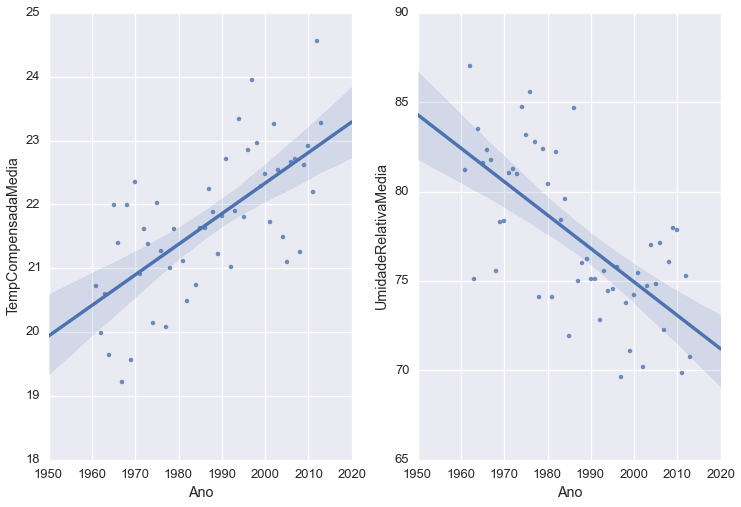

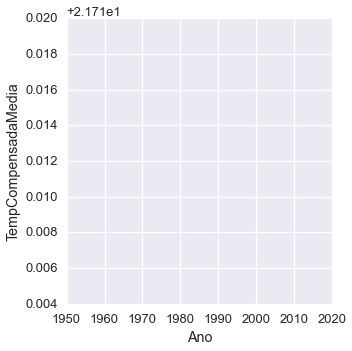

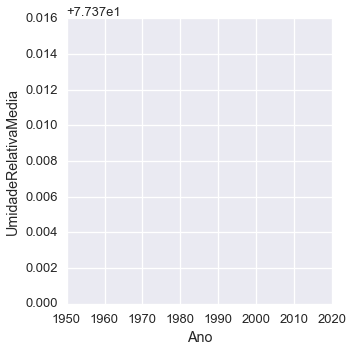

In [84]:
temp['Ano'] = temp.Data.apply(lambda x: x.year)
f, (ax1, ax2) = plt.subplots(1, 2)
sns.lmplot("Ano", "TempCompensadaMedia", temp, ax=ax1)
sns.lmplot("Ano", "UmidadeRelativaMedia", temp, ax=ax2)
f.tight_layout();

In [53]:
ss_temp = pd.merge(ss_long, temp, left_on='data', right_on='Data')
ss_temp.head().transpose()

,0,1,2,3,4
nome,Carlos Lopes,Rosa Mota,João da Mata,Rosa Mota,Carlos Lopes
pais,Portugal,Portugal,Brasil,Portugal,Portugal
corrida,58,58,59,59,60
ano,1982,1982,1983,1983,1984
horario,1982-12-31 23:05:00,1982-12-31 23:05:00,1983-12-31 23:05:00,1983-12-31 23:05:00,1984-12-31 23:05:00
tempo,0 days 00:39:41,0 days 00:47:21,0 days 00:37:39,0 days 00:43:44,0 days 00:36:43
percurso,13548,13548,12600,12600,12640
data,1982-12-31 00:00:00,1982-12-31 00:00:00,1983-12-31 00:00:00,1983-12-31 00:00:00,1984-12-31 00:00:00
pace,175,209,179,208,174
sexo,masculino,feminino,masculino,feminino,masculino


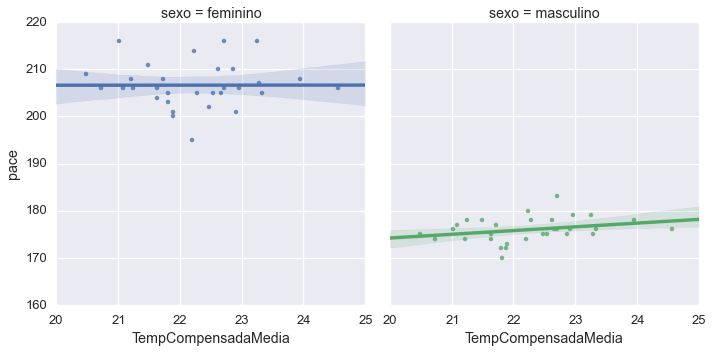

In [39]:
sns.lmplot("TempCompensadaMedia", "pace", ss_temp, hue='sexo', col='sexo');

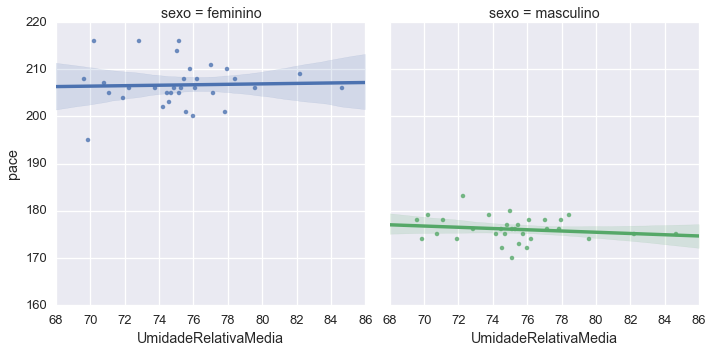

In [40]:
sns.lmplot("UmidadeRelativaMedia", "pace", ss_temp, hue='sexo', col='sexo');

In [69]:
ss_temp_aux = ss_temp.query("sexo == 'masculino'")
X = ss_temp_aux.TempCompensadaMedia
X = sm.add_constant(X)
y = ss_temp_aux.pace/60
mod = sm.OLS(y, X, missing='drop')
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   pace   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     2.562
Date:                Wed, 08 Apr 2015   Prob (F-statistic):              0.120
Time:                        07:53:22   Log-Likelihood:                 55.056
No. Observations:                  31   AIC:                            -106.1
Df Residuals:                      29   BIC:                            -103.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                   2.6382    

In [70]:
ss_temp_aux = ss_temp.query("sexo == 'masculino'")
X = ss_temp_aux.UmidadeRelativaMedia
X = sm.add_constant(X)
y = ss_temp_aux.pace/60
mod = sm.OLS(y, X, missing='drop')
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   pace   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.8682
Date:                Wed, 08 Apr 2015   Prob (F-statistic):              0.359
Time:                        07:54:13   Log-Likelihood:                 55.743
No. Observations:                  32   AIC:                            -107.5
Df Residuals:                      30   BIC:                            -104.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                    3.0993 

In [67]:
ss_temp_aux.pace/60

0     2.916667
2     2.983333
4     2.900000
6     2.900000
8     2.916667
10    3.000000
12    2.866667
14    2.900000
16    2.833333
18    2.933333
20    2.933333
22    2.883333
24    2.933333
26    2.866667
28    2.916667
30    2.966667
32    2.983333
34    2.966667
36    2.916667
38    2.950000
40    2.983333
42    2.916667
44    2.966667
46    2.950000
48    2.933333
50    3.050000
52    2.966667
54    2.966667
56    2.933333
58    2.900000
60    2.933333
62    2.916667
Name: pace, dtype: float64

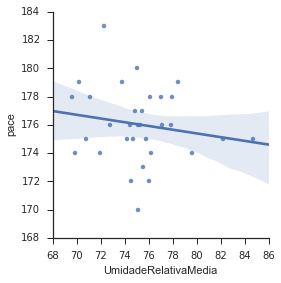

In [277]:
import seaborn as sns
sns.set(style="ticks")

sns.lmplot("UmidadeRelativaMedia", "pace", data=ss_temp,
           palette="muted", size=4)

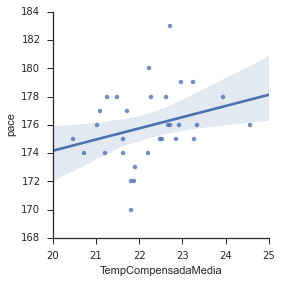

In [278]:
sns.lmplot("TempCompensadaMedia", "pace", data=ss_temp,
           palette="muted", size=4)

In [311]:
mod = sm.RLM(y, X, missing='drop')
res = mod.fit()
print(res.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                   pace   No. Observations:                   32
Model:                            RLM   Df Residuals:                       30
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 29 Mar 2015                                         
Time:                        16:31:03                                         
No. Iterations:                    11                                         
                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                  183.8189 